# Neural Network for Leafs

## Preliminaries

In [1]:
%load_ext autoreload
#nice magic to reload modules without kernelrestart
%autoreload 2
# packages not excluded by aimport -<name> are reloaded everytime code is executed! 

import sys
%aimport -sys
import os
%aimport -os
print('Current working directory:', os.getcwd())

import numpy as np
%aimport -numpy
from timeit import default_timer as timer
%aimport -default_timer
import matplotlib.pyplot as plt
%aimport -matplotlib.pyplot
%matplotlib notebook
# or use "inline" instead

# If academia_ai is not installed, include its path here (you might have to enter your custom path here)
path_to_academia_ai = os.path.join(os.pardir, os.pardir)
if path_to_academia_ai not in sys.path:
    sys.path.append(path_to_academia_ai)
import academia_ai as ai
#%aimporta

Current working directory: C:\Users\sophi\Dropbox\academia_2016\academia_AI\academia_ai\examples
Reloaded leafs!
Loaded preprocessing!
Reloaded plotting!


<IPython.core.display.Javascript object>


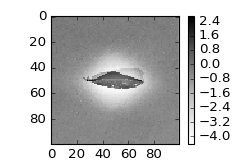

In [16]:
if 1:    
    #load data --> create a training and a testing list
    #path = 'C:\Users\sophi\Dropbox\academia_2016\academia_AI\academia_ai\leafs\data\100x100'
    path = "..\\leafs\\data\\100x100"
    
    data = ai.preprocessing.createTrainingAndTestingList(path, shuffle = True)
    trainset1 = data[0]
    testset1 = data[1]
    #optional nomalization
    ai.preprocessing.normalize(trainset1)
    ai.preprocessing.normalize(testset1)

    #take from training and testing only the matrices, not the whole object "leaf"
    training_images1 = [np.array(leaf.image) for leaf in trainset1]
    training_solutions1 = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset1]
    test_images1 = [np.array(leaf.image) for leaf in testset1]
    test_solutions1 = [ai.preprocessing.desired_output(leaf.label) for leaf in testset1]

    # Plot of an example image
    if 1:
        plt.figure(figsize=(3,2))
        plt.imshow(training_images1[0], cmap='Greys', interpolation='none')
        plt.colorbar()

In [17]:
if 0:    
    #load data --> create a training and a testing list
    #path = '/Users/Dino/Dropbox/Academia2016/academia_AI/academia_ai/leafs/data/50x50'
    path = '..\\leafs\\data\\100x100'
    data = ai.preprocessing.createTrainingAndTestingList(path, shuffle = True)
    trainset2 = data[0]
    testset2 = data[1]
    #optinal nomalization
    #ai.preprocessing.normalize(trainset)
    #ai.preprocessing.normalize(testset)

    #take from training and testing only the matrixes, not the whole object "leaf"
    training_images2 = [np.array(leaf.image) for leaf in trainset2]
    training_solutions2 = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset2]
    test_images2 = [np.array(leaf.image) for leaf in testset2]
    test_solutions2 = [ai.preprocessing.desired_output(leaf.label) for leaf in testset2]

    # Plot of an example image
    if 1:
        plt.figure(figsize=(3,2))
        plt.imshow(training_images2[0], cmap='Greys', interpolation='none')
        plt.colorbar()

## Create layers and build neural network

The net takes dimension (1, 50, 50) as each leaf is represented by
one (greyscale) image of dimension 50x50 pixels. It returns
dimension (7, 1, 1) corresponding to the 7 possible outcomes
[0,1,2,3,4,5,6]. The arrays are always kept three-dimensional
for consistency and are stacked along the first axis (depth).

In [18]:
net1 = 4

if net1 == 1: #one training takes 80s  
    cl = ai.ConvolutionLayer(nr_filters = 12, filter_shape=(9,9), stride=1)
    relu = ai.ReLuLayer()
    full = ai.FullyConnectedLayer(input_shape=(12,100,100), output_shape=(7,1,1))

    net1 = ai.ConvolutionalNeuralNet() 
    net1.add_layer(cl)  
    net1.add_layer(relu)
    net1.add_layer(full)
    
    net1.pprint()
    
if net1 == 2: #one training takes 500s
    cl = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
    relu1 = ai.ReLuLayer(iid = 1)
    full1 = ai.FullyConnectedLayer(input_shape=(9,50,50), output_shape=(3,10,10))

    cl2 = ai.ConvolutionLayer(nr_filters=3, filter_shape=(5,5), stride=1)
    relu2 = ai.ReLuLayer(iid = 2)
    full2 = ai.FullyConnectedLayer(input_shape=(9,10,10), output_shape=(7,1,1))

    net1 = ai.ConvolutionalNeuralNet() 
    net1.add_layer(cl)  
    net1.add_layer(relu1)
    net1.add_layer(full1)
    net1.add_layer(cl2)
    net1.add_layer(relu2)
    net1.add_layer(full2)
    
    net1.pprint()
    
if net1 == 3:
    cl = ai.ConvolutionLayer(nr_filters=12, filter_shape=(9,9), stride=1)
    cl2 = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
    #th = ai.HyperbolicTangentLayer()
    #sig= ai.SigmoidLayer(learning=False)
    relu = ai.ReLuLayer()
    full = ai.FullyConnectedLayer(input_shape=(12,50,50), output_shape=(7,1,1))

    net1 = ai.ConvolutionalNeuralNet() 
    net1.add_layer(cl)  
    net1.add_layer(relu)
    #net1.add_layer(cl2)
    net1.add_layer(full)
    
    net1.pprint()
if net1 == 4:
    cl = ai.ConvolutionLayer(nr_filters=15, filter_shape=(9,9), stride=1)
    cl2 = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
    th = ai.HyperbolicTangentLayer()
    #sig= ai.SigmoidLayer(learning=False)
    relu = ai.ReLuLayer()
    full = ai.FullyConnectedLayer(input_shape=(15,100,100), output_shape=(7,1,1))

    net1 = ai.ConvolutionalNeuralNet() 
    net1.add_layer(cl)  
    net1.add_layer(th)
    #net1.add_layer(cl2)
    net1.add_layer(full)
net1.pprint()

Convolutional Neural Network containing the following 3 layers:
Convolutional layer with 15 filters of shape (9, 9)
tangent hyperbolicus layer with m= 0.6666666666666666 and alpha= 1.7159 and beta= 0
FullyConnectedLayer with input_shape (15, 100, 100) and output_shape (7, 1, 1)
Properites of weights: MIN= -0.02 MAX= 0.01 MEAN= 0.0 VAR= 0.0


In [5]:
net2 = 1

if net2 == 1: #one training takes 80s  
    cl = ai.ConvolutionLayer(nr_filters = 12, filter_shape=(9,9), stride=1)
    relu = ai.ReLuLayer()
    full = ai.FullyConnectedLayer(input_shape=(12,50,50), output_shape=(7,1,1))

    net2 = ai.ConvolutionalNeuralNet() 
    net2.add_layer(cl)  
    net2.add_layer(relu)
    net2.add_layer(full)
    
    net2.pprint()

Convolutional Neural Network containing the following 3 layers:
Convolutional layer with 12 filters of shape (9, 9)
ReLu Layer with ID= -1
FullyConnectedLayer with input_shape (12, 50, 50) and output_shape (7, 1, 1)
Properites of weights: MIN= -0.02 MAX= 0.03 MEAN= 0.0 VAR= 0.0


Classified label: 0
Correct label: 6


<IPython.core.display.Javascript object>


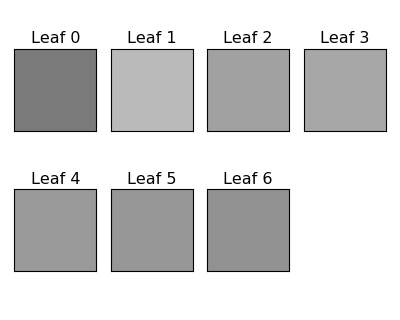

In [18]:
# HELP WHAT IS THIS FOR???
leaf_ex = training_images[0]
sol_ex = training_solutions[0]
result = net.forward_prop(leaf_ex, save_intermediate=True)
intermediate = net.intermediate_results
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol_ex))

# Plot the result after propagating through the net
'''
fig, axarr = plt.subplots(2, 4, figsize=(5,4))
for x in range(2):
    for y in range(4):
        if x+2*y == 7:
            plt.delaxes(axarr[x, y])
            continue
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=-1, vmax=1)
        axarr[x, y].set_title('Leaf '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
'''
fig, axarr = plt.subplots(2,4, figsize=(5,4))
for i in range(7):
    axarr.flatten()[i].imshow(result[i],cmap='Greys', vmin=-1, vmax=1)
    axarr.flatten()[i].set_title('Leaf '+str(i))
    axarr.flatten()[i].get_xaxis().set_visible(False)
    axarr.flatten()[i].get_yaxis().set_visible(False)
plt.delaxes(axarr.flatten()[7])
plt.tight_layout()

# Do some training and save the net

new training function: train2(self, training_images, training_solutions, test_images,test_solutions, learning_rate, iterations=1, printTimeConsumtion = False):

In [1]:
learning_rate = 1e-5
iterations = 2
net1.train2(training_images1, training_solutions1, test_images1, test_solutions1, learning_rate, iterations, True)
#net2.train2(training_images2, training_solutions2, test_images2, test_solutions2, learning_rate, iterations, True)

NameError: name 'net1' is not defined

In [23]:
net1.save('data/leafnet_100x100_withNz_20170208_bySe.pkl')

Saved net in file: data/leafnet_100x100_withNz_20170208_bySe.pkl


<IPython.core.display.Javascript object>


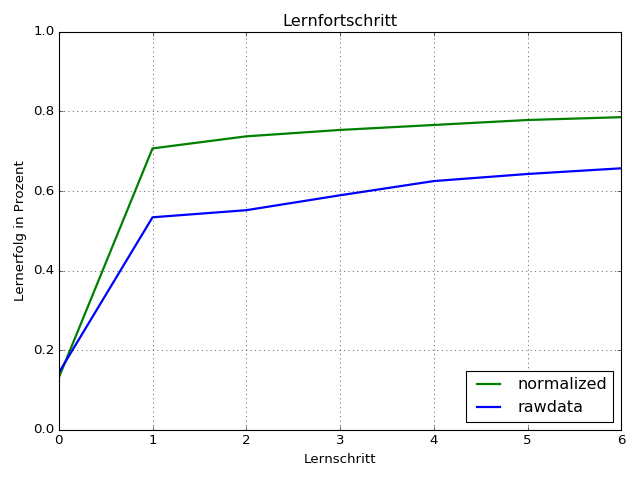

In [7]:
if 0:
    net1.save('data/leafnet1_50x50_withNz_20170204_byAm_V1.pkl')
    net2.save('data/leafnet1_50x50_withoutNz_20170204_byAm_V1.pkl')
    
sn1 = net1.success_list
sn2 = net2.success_list

plt.figure()
plt.plot(sn1, 'g-', label='normalized', linewidth = 2)
plt.plot(sn2, 'b-', label='rawdata', linewidth = 2)
plt.legend(loc = 'lower right')
plt.ylim(0,1)
plt.xlabel('Lernschritt')
plt.ylabel('Lernerfolg in Prozent')
plt.title('Lernfortschritt')
plt.tight_layout()
plt.grid(True)



<IPython.core.display.Javascript object>


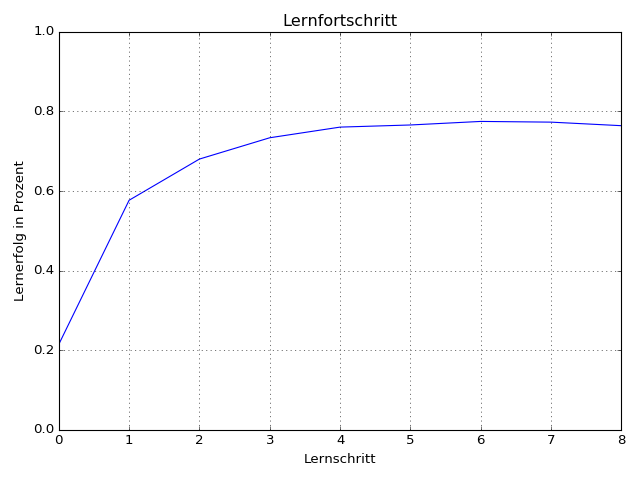

In [26]:
net1.plott_lernSuccess(plt)

# testing

<IPython.core.display.Javascript object>


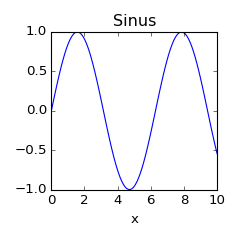

In [11]:
x=np.linspace(0,10,100)
plt.figure(figsize=(3,3))
plt.plot(x,np.sin(x))
plt.xlabel('x')
plt.title('Sinus')
plt.tight_layout()

<IPython.core.display.Javascript object>


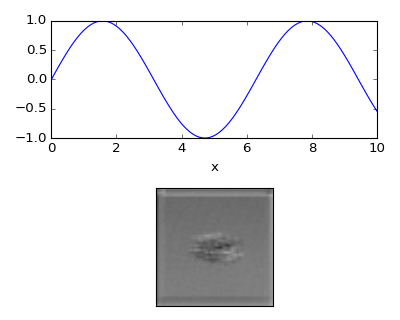

In [31]:
x=np.linspace(0,10,100)
fig, axarr = plt.subplots(2, 1, figsize=(5,4))
axarr[0].plot(x,np.sin(x))
axarr[1].imshow(intermediate[1][0],cmap='Greys',vmin=-1, vmax=1)
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[0].set_xlabel('x')

plt.tight_layout()

# ADAPT images and solutions to be numpy and desired shape!

In [36]:
learning_rate = 1e-5
start = timer()
net.train(training_images, training_solutions, learning_rate, iterations=1)
end = timer()
print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)

Training took 92.00413957901765 seconds.


In [44]:
net.save('data/leaf_network-small-SE-PK.pkl')
net.load('data/leaf_network-SE-PK.pkl')

Saved net in file: data/leaf_network-small-SE-PK.pkl


In [78]:
success_point=[]
for i in range(6):
    learning_rate = 1e-5
    start = timer()
    net.train(training_images, training_solutions, learning_rate, iterations=1)
    end = timer()
    print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)
    
    success_point.append(net.test_net(test_images, test_solutions))
    

Training took 51.53026971700092 seconds.
Training took 52.89118736100136 seconds.
Training took 51.46983148099753 seconds.
Training took 54.064269168000465 seconds.
Training took 52.97072689900233 seconds.
Training took 52.010301188001904 seconds.


In [72]:
labels = ['' for i in range(100)]
labels[::10] = np.linspace(0,1,10)
print(labels)

[0.0, '', '', '', '', '', '', '', '', '', 0.1111111111111111, '', '', '', '', '', '', '', '', '', 0.22222222222222221, '', '', '', '', '', '', '', '', '', 0.33333333333333331, '', '', '', '', '', '', '', '', '', 0.44444444444444442, '', '', '', '', '', '', '', '', '', 0.55555555555555558, '', '', '', '', '', '', '', '', '', 0.66666666666666663, '', '', '', '', '', '', '', '', '', 0.77777777777777768, '', '', '', '', '', '', '', '', '', 0.88888888888888884, '', '', '', '', '', '', '', '', '', 1.0, '', '', '', '', '', '', '', '', '']


<IPython.core.display.Javascript object>


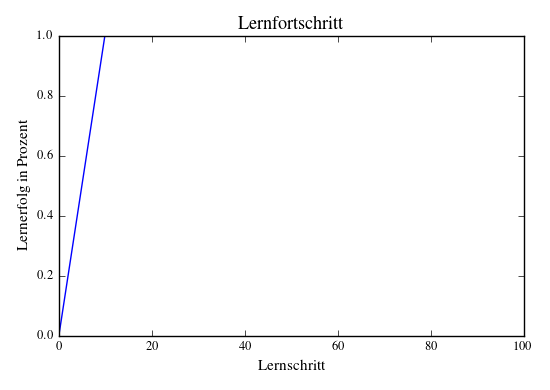

In [103]:
plt.figure()
plt.plot(success_point)
plt.ylim(0,1)
plt.xlabel('Lernschritt')
plt.ylabel('Lernerfolg in Prozent')
plt.title('Lernfortschritt')
#plt.yticks(np.linspace(0,1,100), labels)
plt.tight_layout()